In [5]:
%matplotlib inline
import matplotlib.pyplot
import pandas
import sklearn.decomposition

In [8]:
all_trains = pandas.read_csv('../../../data/sydtrains.csv', index_col=1, thousands=',')

## trains = all_trains[all_trains.YEAR == 2014]
trains.head()

In [12]:
numeric_columns = [x for x in trains.columns if x.endswith('0')]
numeric_columns

['IN_0200_0600',
 'OUT_0200_0600',
 'IN_0600_0930',
 'OUT_0600_0930',
 'IN_0930_1500',
 'OUT_0930_1500',
 'IN_1500_1830',
 'OUT_1500_1830',
 'IN_1830_0200',
 'OUT_1830_0200']

In [14]:
#creating a thing to do principle component analysis
pca = sklearn.decomposition.PCA(whiten=True)

In [15]:
mangled_station_data = pca.fit_transform(trains[numeric_columns])

In [17]:
mangled_station_data
#each element in the array represents a list of all the factors affecting one station

array([[ -9.99249128,  -0.86429306,  -8.26969232, ...,   0.52481657,
         -0.97881544,   0.01429659],
       [ -9.49158615,   2.10975144,  -4.07870519, ...,  -0.18495588,
         -0.50349106,   0.13775049],
       [ -7.04285247,   5.71226833,  10.11088049, ...,  -0.05141355,
         -0.44220709,  -0.78419011],
       ..., 
       [  0.32010123,   0.60167819,  -0.30881945, ...,  -0.16576932,
         -0.04395234,   0.05612209],
       [  0.32010123,   0.60167819,  -0.30881945, ...,  -0.16576932,
         -0.04395234,   0.05612209],
       [  0.32010123,   0.60167819,  -0.30881945, ...,  -0.16576932,
         -0.04395234,   0.05612209]])

In [24]:
def colouring(line):
    if line == 'CBD': return 'red'
    if line == 'Western': return 'green'
    if line == 'Eastern Suburbs': return 'pink'
    return 'blue'

colour_chart = map(colouring, trains.LINE)
colour_chart

['red',
 'red',
 'red',
 'green',
 'blue',
 'red',
 'blue',
 'pink',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'green',
 'blue',
 'pink',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'green',
 'green',
 'pink',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 '

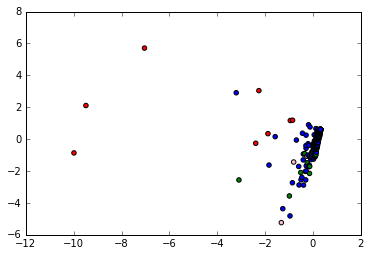

In [26]:
matplotlib.pyplot.scatter(mangled_station_data[:,0],
                         mangled_station_data[:,1],
                         c = colour_chart)

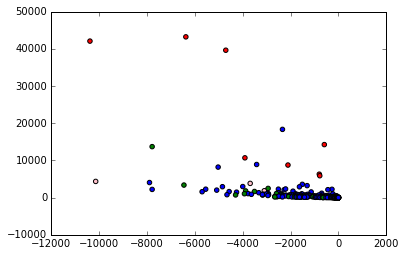

In [28]:
#first two dimensions are able to characterise the data
#turned the x axis around to match up with the above graph
matplotlib.pyplot.scatter(-trains.IN_0600_0930, trains.OUT_0600_0930, c = colour_chart)

In [29]:
pca.explained_variance_ratio_

array([  9.25253343e-01,   6.13005818e-02,   9.75370440e-03,
         1.78539213e-03,   1.02884474e-03,   4.50450877e-04,
         3.71449167e-04,   5.16184369e-05,   4.48104295e-06,
         1.33981591e-07])

In [30]:
#format as a percentage all the above numbers
for r in pca.explained_variance_ratio_:
    print "%.2f" % (r*100,)

92.53
6.13
0.98
0.18
0.10
0.05
0.04
0.01
0.00
0.00


In [31]:
#92% of the prediction can be based on the first variable (abstracted from the dimensions)

In [32]:
pca.components_
#find the biggest numbers or numbers that are close - and see which columns they match up to, by counting the column #
#component number 1 looks like its about the number of people using the station

array([[-0.01216888, -0.01181708, -0.13570067, -0.59073739, -0.243829  ,
        -0.32006833, -0.60005267, -0.20835379, -0.23880968, -0.09962957],
       [-0.01119104, -0.00516797, -0.637461  ,  0.33967958, -0.24082972,
        -0.15102742,  0.18628327, -0.52786231,  0.0797915 , -0.27855756],
       [ 0.00560474, -0.00450715,  0.40359311,  0.42393126, -0.27283612,
        -0.66111334,  0.07761719,  0.05264239, -0.3686114 ,  0.03409918],
       [ 0.00653215,  0.005783  , -0.11162783,  0.05920499, -0.25380845,
        -0.34804601, -0.20313728,  0.35921969,  0.77966863,  0.14218445],
       [-0.00422339, -0.00167244, -0.20918806, -0.14272018,  0.2436577 ,
        -0.25405611,  0.1899084 , -0.25989915, -0.03726531,  0.84079463],
       [-0.0084373 , -0.02423273,  0.39522302, -0.1236274 , -0.67429792,
         0.34138853,  0.15157494, -0.3875952 ,  0.17532311,  0.22954217],
       [-0.03164292,  0.01273045,  0.27397658,  0.43191696,  0.33258827,
         0.09438617, -0.60461027, -0.45598628

In [33]:
numeric_columns

['IN_0200_0600',
 'OUT_0200_0600',
 'IN_0600_0930',
 'OUT_0600_0930',
 'IN_0930_1500',
 'OUT_0930_1500',
 'IN_1500_1830',
 'OUT_1500_1830',
 'IN_1830_0200',
 'OUT_1830_0200']

In [42]:
#moving back to station space
pca.inverse_transform([0, 0, 0, 0, 0, 6, 0, 0, 0, 0])

array([   43.79477031,     9.10791219,  1567.31031986,  1008.10186911,
         110.78639712,  1147.32427772,  1376.79042614,   748.28879419,
         558.664119  ,   740.7839106 ])

In [38]:
mangled_station_data[trains.index == 'Central']

array([[-9.99249128, -0.86429306, -8.26969232, -6.17066718, -1.63718664,
         2.43026268,  2.82833108,  0.52481657, -0.97881544,  0.01429659]])

In [39]:
#the more extreme the number, the more it matters
mangled_station_data[trains.index == 'Bondi Junction']

array([[-1.32061629, -5.23695032,  2.29484114,  1.42884695, -1.36474663,
         5.99142405,  1.92812231, -1.48419539,  1.72644061, -0.06481982]])

In [40]:
mangled_station_data[trains.index == 'Town Hall']

array([[ -9.49158615,   2.10975144,  -4.07870519,  11.91317797,
         -0.53502771,  -1.06419605,  -2.3107553 ,  -0.18495588,
         -0.50349106,   0.13775049]])

In [43]:
#fake bondi junction station
pca.inverse_transform([-1.3, -5, 2, 0, 0, 6, 2, 0, 0, 0])

array([  268.79276949,   170.52538641,  9718.67797976,  4260.36564932,
        4477.12607503,  4723.39694641,  5353.09290799,  7794.13873323,
        1604.2383566 ,  4463.71960403])

In [44]:
#fake bondi junction station
pca.inverse_transform([-10, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([   961.61493118,    916.26403361,  11318.20142194,  45280.68631509,
        19001.13668724,  24730.66775277,  46073.28415773,  16703.63718178,
        18233.24479258,   7959.73876086])

In [45]:
simplifier = sklearn.decomposition.PCA(whiten=True, n_components =2)

In [47]:
simplified_data = simplifier.fit_transform(trains[numeric_columns])
simplified_data
#first column is a measure of how rural it is

array([[ -9.99249128e+00,  -8.64293060e-01],
       [ -9.49158615e+00,   2.10975144e+00],
       [ -7.04285247e+00,   5.71226833e+00],
       [ -3.09312274e+00,  -2.56002800e+00],
       [ -3.20762483e+00,   2.90955318e+00],
       [ -2.39183662e+00,  -2.58609347e-01],
       [ -1.83743736e+00,  -1.62604137e+00],
       [ -1.32061629e+00,  -5.23695032e+00],
       [ -1.25954002e+00,  -4.36105965e+00],
       [ -1.88067667e+00,   3.45007538e-01],
       [ -2.25922559e+00,   3.04325248e+00],
       [ -9.59150871e-01,  -4.81643143e+00],
       [ -1.57813698e+00,   1.55865986e-01],
       [ -9.84131498e-01,  -3.56265955e+00],
       [ -8.57598095e-01,  -2.73547475e+00],
       [ -8.04225883e-01,  -1.43436013e+00],
       [ -5.80001780e-01,  -2.87453133e+00],
       [ -4.98311828e-01,  -2.54384632e+00],
       [ -5.94508410e-01,  -1.71277446e+00],
       [ -4.60240465e-01,  -2.39547651e+00],
       [ -5.07409934e-01,  -2.09305422e+00],
       [ -9.47336062e-01,   1.16755332e+00],
       [ -

In [50]:
#what would a station look like that scored 1 in the second component?
zip(numeric_columns, simplifier.inverse_transform([0,1]))
#measure of party life..?

[('IN_0200_0600', 30.614477050421012),
 ('OUT_0200_0600', 23.142704318733422),
 ('IN_0600_0930', -50.02729636122308),
 ('OUT_0600_0930', 1783.8689112078268),
 ('IN_0930_1500', 314.66670487106359),
 ('OUT_0930_1500', 519.01167837246544),
 ('IN_1500_1830', 1585.1741736313747),
 ('OUT_1500_1830', 116.32887548867541),
 ('IN_1830_0200', 538.69093487624491),
 ('OUT_1830_0200', -22.196630775093581)]

In [51]:
reconstituted = simplifier.inverse_transform(simplified_data)

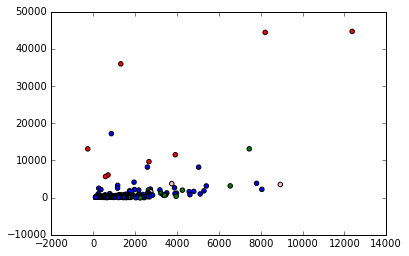

In [53]:
matplotlib.pyplot.scatter(reconstituted[:,4], reconstituted[:,3], c = colour_chart)

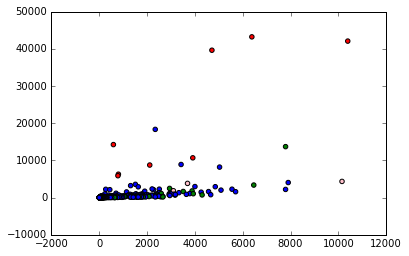

In [54]:
matplotlib.pyplot.scatter(trains.IN_0600_0930, trains.OUT_0600_0930, c = colour_chart)

In [55]:
#this describes the percentage of data is encompassed
simplifier.explained_variance_ratio_

array([ 0.92525334,  0.06130058])

In [56]:
#this describes how important each column (of the original dataset) is to this new component
simplifier.components_

array([[-0.01216888, -0.01181708, -0.13570067, -0.59073739, -0.243829  ,
        -0.32006833, -0.60005267, -0.20835379, -0.23880968, -0.09962957],
       [-0.01119104, -0.00516797, -0.637461  ,  0.33967958, -0.24082972,
        -0.15102742,  0.18628327, -0.52786231,  0.0797915 , -0.27855756]])

In [62]:
#try sparse PCA (if close to 0, it will just count it as 0)
sparse = sklearn.decomposition.SparsePCA(n_components=6)

In [63]:
sparse_data = sparse.fit_transform(trains[numeric_columns])

In [64]:
sparse.components_

array([[ -1.79368881e+03,  -1.64476930e+03,  -2.31054403e+04,
         -8.02488504e+04,  -3.43536644e+04,  -4.41667041e+04,
         -8.16586139e+04,  -3.16942983e+04,  -3.14615578e+04,
         -1.46248319e+04],
       [  5.09232864e+02,   1.61876235e+02,   2.59459201e+04,
         -1.27290671e+04,   7.44349982e+03,   3.61661645e+03,
         -8.26540892e+03,   2.05535960e+04,  -4.07056360e+03,
          9.94289488e+03],
       [  8.22324344e+01,  -6.68557959e+01,   4.46177729e+03,
          5.84110325e+03,  -4.03577675e+03,  -9.72718100e+03,
          7.25847429e+02,   8.78425517e+01,  -5.10029929e+03,
          0.00000000e+00],
       [  3.81734238e+01,   3.19421337e+01,  -4.29703698e+02,
          2.10058879e+02,  -1.53479312e+03,  -1.35488947e+03,
         -1.16752629e+03,   2.23454154e+03,   4.78580853e+03,
          5.69056820e+02],
       [  2.78413502e+01,   1.19389298e+01,   0.00000000e+00,
          5.54510095e+02,  -7.80036919e+02,   1.10024872e+03,
         -9.73196700e+02

In [65]:
sparse_data[:, 1].min()

-0.28755231917234991

In [69]:
trains[sparse_data[:,1] < -0.28]

,LINE,YEAR,SURVEY_DATE_USED,WHETHER_SURVEYED,IN_0200_0600,OUT_0200_0600,IN_0600_0930,OUT_0600_0930,IN_0930_1500,OUT_0930_1500,IN_1500_1830,OUT_1500_1830,IN_1830_0200,OUT_1830_0200,IN_24_HOURS,OUT_24_HOURS,RANK,STATION_SORT_ID
STATION,,,,,,,,,,,,,,,,,,
Wynyard,CBD,2014,20/05/2014,Yes,590,570,4710,39620,9200,11180,35010,6510,10690,2330,60200,60200,3,103


In [ ]:
#manifold learning

In [71]:
import sklearn.manifold

In [78]:
lle = sklearn.manifold.LocallyLinearEmbedding(n_components=2, n_neighbors=20, method='modified')

In [79]:
lle_transformed = lle.fit_transform(trains[numeric_columns])

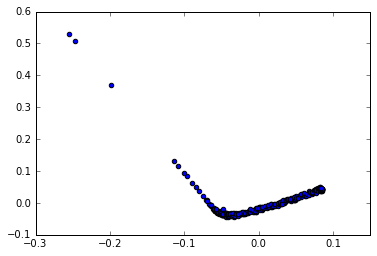

In [81]:
matplotlib.pyplot.scatter(lle_transformed[:,0], lle_transformed[:,1])